# Assignment 1
## Part 1: Moore's Law
### Question 1
After looking at the data, I decided to use the CINT benchmark. Thus, the first steps I will take are to filter the 'summaries' data and store only the data that pertains to the CINT95, CINT2000, and CINT2006 benchmarks into a new Pandas dataframe called 'data'. I do this below.

In [6]:
import pandas as pd
import numpy as np

benchmarks = pd.read_csv("/content/drive/My Drive/CS156/Assignment1/benchmarks.csv")
summaries = pd.read_excel("/content/drive/My Drive/CS156/Assignment1/summaries.xlsx", 0)

data = summaries[['hwAvail', 'base']]
data.head()

valid_benchmarks = summaries['benchType']==('CINT95' or 'CINT2000' or 'CINT2006')

data = data[valid_benchmarks]



/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Quesiton 2 and 3

In the code below, I plot the $\log_2(\text{benchmark})$ on the y-axis, and the year on the x-axis of a scatter-plot (in blue), as well as the predicted y's based on my linear regression model (in red).  



/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


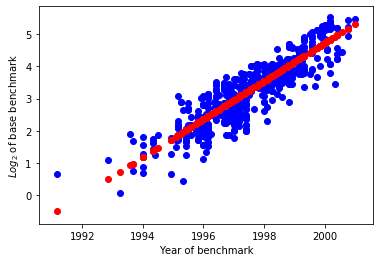

Your slope is:
 [0.00161656]
Your intercept is:
 -1175.5564573786735


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import datetime as dt

#Copying the data to a new dataset, for log2 conversion
model_data = pd.DataFrame.copy(data)
model_data['hwAvail']=model_data['hwAvail'].map(dt.datetime.toordinal)
model_data['base'] = np.log2(model_data['base'])


#Creating a linear model
X = model_data[["hwAvail"]]
y = model_data["base"]
lm = linear_model.LinearRegression()
model = lm.fit(X, y)

#Predicting the benchmarks based on year
ypredict = model.predict(model_data[["hwAvail"]])

#Plotting real Ys versus predicted Ys
plt.scatter(data["hwAvail"], model_data["base"], color='blue')
plt.scatter(data["hwAvail"], ypredict, color='red')
plt.ylabel('$Log_2$'+" "+'of base benchmark')
plt.xlabel("Year of benchmark")
plt.show()

#Getting the slope and intercept of my model
slope = model.coef_
intercept = model.intercept_
print('Your slope is:\n', slope)
print('Your intercept is:\n', intercept)

### Question 4
From inspection of the graph above, we can see that Moore's law is keeping up quite nicely, in fact. Take the difference of two years between 1996 and 1998: the difference in base benchmark was of roughly 1 unit. In this case, since we are plotting the $\log_2{(y)}$ on the y-axis, we have a difference of $1 = \log_2{(\Delta y)}\rightarrow2^1=\Delta y$. In other words, the difference in benchmark was of 2 units in two years, which is in line with Moore's law. Note that the slpe and intecepts of my model, outputted below the chart, are not useful because of the way my model is convering years to workable numbers using a python datetime.toordinal funciton.


## Part 2: MNIST Digits
### Question 1 & 2
Below, I use code taken from scikit learn to import and print the first 5 MNIST Digits:



<Figure size 432x288 with 0 Axes>

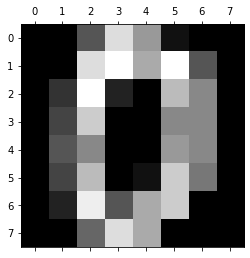

<Figure size 432x288 with 0 Axes>

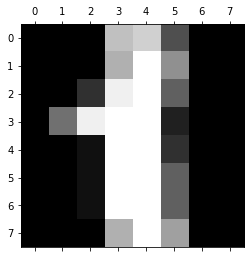

<Figure size 432x288 with 0 Axes>

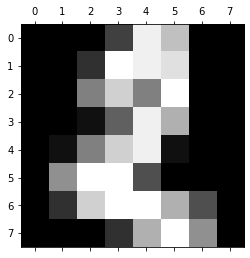

<Figure size 432x288 with 0 Axes>

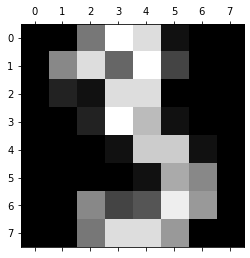

<Figure size 432x288 with 0 Axes>

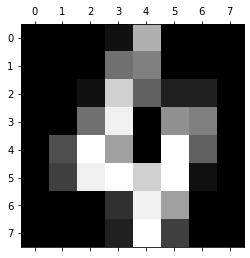

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()

import matplotlib.pyplot as plt 
for i in range(5):
  plt.gray() 
  plt.matshow(digits.images[i]) 
  plt.show() 

### Question 3 & 4

Below, I first prepare the data in the MNIST dataset for training by filtering out all digits except for 3 and 7. I then split the data into traing and testing sets, I train my data, and I verify error rates by looking at the 'accuracy' score:

In [126]:
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

#Below, I filter the digits data to contain only the data and targets for 3s and 7s
the_data = digits.data[digits.target==(3 or 7)]

#Here I create a targets np.array with only 3s and 7s
the_targets = []
for i in range(len(the_data)):
  if i%2 ==0:
    the_targets.append(3)
  else:
    the_targets.append(7)
  

#Here I split the data between test and train sets
X_train = the_data[0:100]
y_train = the_targets[0:100]
X_test = the_data[100:]
y_test = the_targets[100:]

#Here I implement the K nearest neighbors with the classic approach
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Here I predict the classes in y based on my now trained model
y_predict = knn.predict(X_test)

#Finally, I print the accuracy score comparing predictions to actual classification
print(accuracy_score(y_test, y_predict))



0.5903614457831325


I obtained a score of $\approx$55% accuracy. Note that I chose n = 5 arbitrarily for this classifier. A question I have is whether I can improve my accuracy by changing n. To answer this, I varied the n from 1 to 10, and created the chart below comparing the value of n and the accuracy rate:

Text(0.5, 0, 'N for number of Nearest Neighbors')

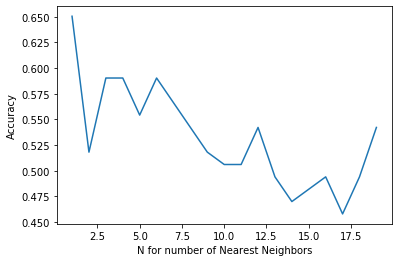

In [139]:
nlist=[]
accuracylist=[]

for i in range(1, 20):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_predict = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_predict)
  nlist.append(i)
  accuracylist.append(accuracy)



plt.plot(nlist, accuracylist)
plt.ylabel("Accuracy")
plt.xlabel("N for number of Nearest Neighbors")

Interestingly, it seems that the best possible case is when we classify a digit according to its sole nearest neighbor!

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
